In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import nltk

In [8]:
df=pd.read_csv('Stress.csv')

In [9]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [10]:
messages=[line.rstrip() for line in df['text']]

In [11]:
print(len(messages))

2838


In [12]:
messages[50]

"Hey everyone. I need a place to vent and place my feelings because I don't know what to do anymore. This evening while playing a boardgame with my BF and some friends, I found out my BF lied big time. Short: last year we decided that I would join him this year on his skiing trip with his friends (his idea). This wasn't possible in the end (or so he told me) because his friends didn't want to rent a cabin but go on a cheap student skiing trip."

In [13]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.


1 Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help t

In [62]:
messages=pd.DataFrame(df,columns=['text','label'])

In [63]:
messages.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [64]:
messages.describe()

,label
count,2838.000000
mean,0.524313
std,0.499497
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [65]:
messages.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      1350   1338  Hello, You are invited to complete a survey fo...    4
1      1488   1485                                             #NAME?    2

In [66]:
messages['length']=messages['text'].apply(len)

In [67]:
messages.head()

,text,label,length
0,"He said he had not felt that way before, sugge...",1,571
1,"Hey there r/assistance, Not sure if this is th...",0,588
2,My mom then hit me with the newspaper and it s...,1,847
3,"until i met my new boyfriend, he is amazing, h...",1,1277
4,October is Domestic Violence Awareness Month a...,1,533


<AxesSubplot:ylabel='Frequency'>

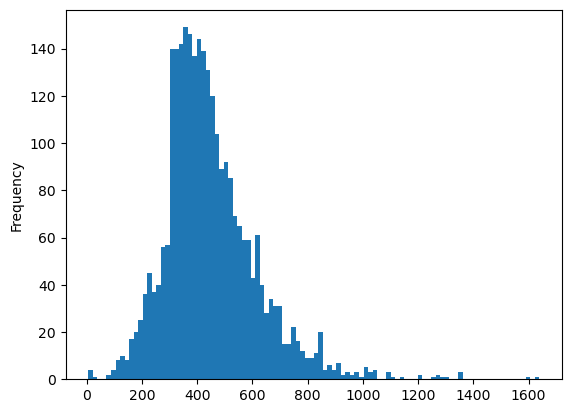

In [68]:
messages['length'].plot.hist(bins=100)

In [69]:
messages['length'].describe()

count    2838.000000
mean      447.996476
std       168.929122
min         6.000000
25%       339.000000
50%       421.000000
75%       528.750000
max      1639.000000
Name: length, dtype: float64

In [70]:
messages[messages['length']==588]['text'].iloc[0]

"Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs."

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

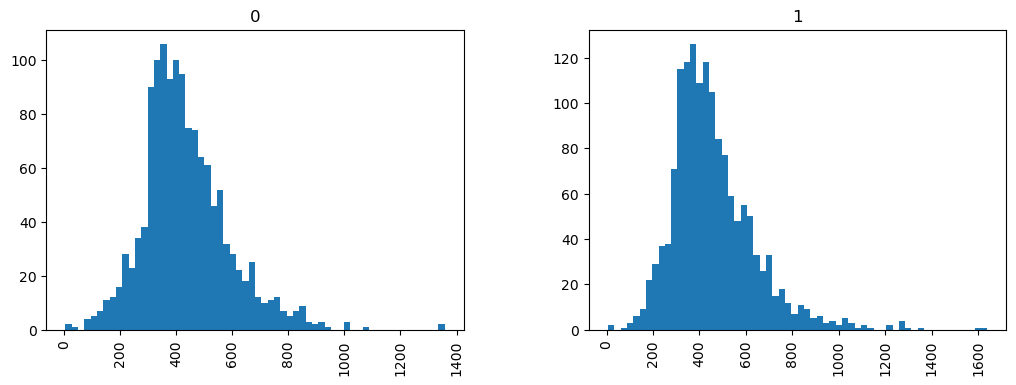

In [71]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [33]:
from nltk.corpus import stopwords

In [72]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [73]:
messages['text'].head(5).apply(text_process)

0    [said, felt, way, suggeted, go, rest, TRIGGER,...
1    [Hey, rassistance, sure, right, place, post, g...
2    [mom, hit, newspaper, shocked, would, knows, d...
3    [met, new, boyfriend, amazing, kind, sweet, go...
4    [October, Domestic, Violence, Awareness, Month...
Name: text, dtype: object

In [74]:
messages.head()

,text,label,length
0,"He said he had not felt that way before, sugge...",1,571
1,"Hey there r/assistance, Not sure if this is th...",0,588
2,My mom then hit me with the newspaper and it s...,1,847
3,"until i met my new boyfriend, he is amazing, h...",1,1277
4,October is Domestic Violence Awareness Month a...,1,533


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

13806


In [77]:
message4 = messages['text']
print(message4)

0       He said he had not felt that way before, sugge...
1       Hey there r/assistance, Not sure if this is th...
2       My mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       October is Domestic Violence Awareness Month a...
                              ...                        
2833    * Her, a week ago: Precious, how are you? (I i...
2834    I don't have the ability to cope with it anymo...
2835    In case this is the first time you're reading ...
2836    Do you find this normal? They have a good rela...
2837    I was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object


In [78]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 0)	2
  (0, 7)	38
  (0, 8)	52
  (0, 9)	5
  (0, 10)	3
  (0, 15)	1
  (0, 16)	2
  (0, 17)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 28)	1
  (0, 29)	11
  (0, 32)	1
  (0, 35)	1
  (0, 38)	1
  (0, 39)	16
  (0, 40)	1
  (0, 41)	1
  (0, 45)	1
  (0, 46)	1
  (0, 48)	9
  (0, 49)	2
  :	:
  (0, 13777)	1
  (0, 13778)	1
  (0, 13779)	1
  (0, 13780)	1
  (0, 13781)	1
  (0, 13782)	2
  (0, 13783)	1
  (0, 13784)	1
  (0, 13785)	3
  (0, 13786)	1
  (0, 13787)	1
  (0, 13788)	1
  (0, 13789)	2
  (0, 13790)	1
  (0, 13791)	2
  (0, 13793)	2
  (0, 13794)	2
  (0, 13795)	1
  (0, 13796)	4
  (0, 13797)	1
  (0, 13798)	2
  (0, 13799)	1
  (0, 13801)	1
  (0, 13804)	1
  (0, 13805)	1
(1, 13806)


In [79]:
print(bow_transformer.get_feature_names()[2])
print(bow_transformer.get_feature_names()[101])

020217
1989


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
messages_bow = bow_transformer.transform(messages['text'])

In [81]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2838, 13806)
Amount of Non-Zero occurences:  104394


In [82]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 13805)	0.0006873720264644883
  (0, 13804)	0.0006873720264644883
  (0, 13801)	0.0006873720264644883
  (0, 13799)	0.0006873720264644883
  (0, 13798)	0.0013747440529289765
  (0, 13797)	0.0006536225291450361
  (0, 13796)	0.002749488105857953
  (0, 13795)	0.0006873720264644883
  (0, 13794)	0.0013072450582900723
  (0, 13793)	0.0013072450582900723
  (0, 13791)	0.0013072450582900723
  (0, 13790)	0.0006873720264644883
  (0, 13789)	0.0013072450582900723
  (0, 13788)	0.0006873720264644883
  (0, 13787)	0.0006873720264644883
  (0, 13786)	0.0006873720264644883
  (0, 13785)	0.0018890306391583477
  (0, 13784)	0.0006873720264644883
  (0, 13783)	0.0006873720264644883
  (0, 13782)	0.0013072450582900723
  (0, 13781)	0.0006873720264644883
  (0, 13780)	0.0006873720264644883
  (0, 13779)	0.0006873720264644883
  (0, 13778)	0.0006873720264644883
  (0, 13777)	0.0006873720264644883
  :	:
  (0, 49)	0.0013072450582900723
  (0, 48)	0.0044614160779814435
  (0, 46)	0.0006873720264644883
  (0, 45)	0.000653622529

In [55]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2838, 103)


In [84]:
from sklearn.naive_bayes import MultinomialNB
stress_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [88]:
all_predictions = stress_detect_model.predict(messages_tfidf)

In [89]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1350
           1       1.00      1.00      1.00      1488

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838



In [91]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['text'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2270 568 2838


In [92]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [93]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025146515700>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [94]:
predictions = pipeline.predict(msg_test)

In [95]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.33      0.90      0.49       101
           1       0.97      0.61      0.75       467

    accuracy                           0.66       568
   macro avg       0.65      0.76      0.62       568
weighted avg       0.85      0.66      0.70       568

